<a href="https://colab.research.google.com/github/aditi10998/EDA_Captsone_Project_2/blob/main/Copy_of_Rossmann_Sales_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Sales Prediction : Predicting sales of a major store chain Rossmann</u></b>

## <b> Problem Description </b>

### Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

### You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment.

## <b> Data Description </b>

### <b>Rossmann Stores Data.csv </b> - historical data including Sales
### <b>store.csv </b> - supplemental information about the stores


### <b><u>Data fields</u></b>
### Most of the fields are self-explanatory. The following are descriptions for those that aren't.

* #### Id - an Id that represents a (Store, Date) duple within the test set
* #### Store - a unique Id for each store
* #### Sales - the turnover for any given day (this is what you are predicting)
* #### Customers - the number of customers on a given day
* #### Open - an indicator for whether the store was open: 0 = closed, 1 = open
* #### StateHoliday - indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None
* #### SchoolHoliday - indicates if the (Store, Date) was affected by the closure of public schools
* #### StoreType - differentiates between 4 different store models: a, b, c, d
* #### Assortment - describes an assortment level: a = basic, b = extra, c = extended
* #### CompetitionDistance - distance in meters to the nearest competitor store
* #### CompetitionOpenSince[Month/Year] - gives the approximate year and month of the time the nearest competitor was opened
* #### Promo - indicates whether a store is running a promo on that day
* #### Promo2 - Promo2 is a continuing and consecutive promotion for some stores: 0 = store is not participating, 1 = store is participating
* #### Promo2Since[Year/Week] - describes the year and calendar week when the store started participating in Promo2
* #### PromoInterval - describes the consecutive intervals Promo2 is started, naming the months the promotion is started anew. E.g. "Feb,May,Aug,Nov" means each round starts in February, May, August, November of any given year for that store

In this Capstone Project.We are going to going to build a model using regression in Machine learning for forecasting the "Sales" column for the test set.
Let's first understand what is regression technique.
Regression analysis is a statistical method to model the relationship between a dependent (target) and independent (predictor) variables with one or more independent variables. More specifically, Regression analysis helps us to understand how the value of the dependent variable is changing corresponding to an independent variable when other independent variables are held fixed. It predicts continuous/real values such as temperature, age, salary, price, etc.

---




# **Important Libraries**





We will import other libraries as per our requirement.

In [2]:
#Mounting Google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import datasets
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


To begin we will first need to explore our dataset.
Let's import our csv files and convert into dataframes.
Here we have two datasets Rossmann Stores Data and stores which consist of information of stores and stores related aspects.

**Data Acquisition**

In [4]:
#Loading files from google drive to colab and storing in a variable
File1="/content/drive/MyDrive/EDA_Capstone_Project2/Data & Resources/Copy of Rossmann Stores Data.csv"
File2="/content/drive/MyDrive/EDA_Capstone_Project2/Data & Resources/Copy of store.csv"

In [5]:
#Creating Dataframes from csv files
Rossmann_Stores_df=pd.read_csv(File1)
Store_df=pd.read_csv(File2)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# **Exploratory Data Analysis**

Let's perform simple tasks on our dataset and explore it more by usng different methods.

In [6]:
#To display total number of rows and columns
Rossmann_Stores_df.shape

(1017209, 9)

In this dataset we can see rows are 1017209 and columns are 9.In all it is very huge data.

In [7]:
#to display total number of rows and columns
Store_df.shape

(1115, 10)

In this dataset there are 1115 rows and 10 columns.As compared to previous dataset this is not that large amount of data.




In [8]:
#To display names of column ,thier datatypes and missing values
Rossmann_Stores_df.info()
Store_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assort

In [9]:
#To overview statistics approach of numerical variables
Rossmann_Stores_df.describe()


,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


In [10]:
#To get the stastical analysis of our datasets
Store_df.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [11]:
#To display first n number of rows 
Rossmann_Stores_df.head(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
5,6,5,2015-07-31,5651,589,1,1,0,1
6,7,5,2015-07-31,15344,1414,1,1,0,1
7,8,5,2015-07-31,8492,833,1,1,0,1
8,9,5,2015-07-31,8565,687,1,1,0,1
9,10,5,2015-07-31,7185,681,1,1,0,1


In [12]:
Store_df.head(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
7,8,a,a,7520.0,10.0,2014.0,0,NaN,NaN,NaN
8,9,a,c,2030.0,8.0,2000.0,0,NaN,NaN,NaN
9,10,a,a,3160.0,9.0,2009.0,0,NaN,NaN,NaN


In [13]:
#To display last n number of rows 
Rossmann_Stores_df.tail(10)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017199,1106,2,2013-01-01,0,0,0,0,a,1
1017200,1107,2,2013-01-01,0,0,0,0,a,1
1017201,1108,2,2013-01-01,0,0,0,0,a,1
1017202,1109,2,2013-01-01,0,0,0,0,a,1
1017203,1110,2,2013-01-01,0,0,0,0,a,1
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


In [14]:
Store_df.tail(10)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1105,1106,a,c,5330.0,9.0,2011.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1106,1107,a,a,1400.0,6.0,2012.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1108,1109,c,a,3490.0,4.0,2011.0,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


# Handling Missing Values

Let's begin with our Data Cleaning Process.



There might be some missing values in store dataset in the columns CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2SinceWeek,Promo2SinceYear and PromoInterval because total number of rows are 1115. Wheareas these columns don't have 1115 enteries.Let's perform some operations to make sure that there should not be any missing values.Handling missing values is very important because all machine learning models does not work with missing data and that will simply lead to error.

In [15]:
#To check null values
Store_df.isnull().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

We saw that are missing values in our dataset but still performing isnull operation helps us to identify missing values more accurately and identifies the null values column if we missed it.

In [16]:
#Handling missing values
Store_df['CompetitionDistance'] = Store_df['CompetitionDistance'].fillna(Store_df['CompetitionDistance']).mean()
Store_df['CompetitionOpenSinceMonth'] = Store_df['CompetitionOpenSinceMonth'].fillna(Store_df['CompetitionOpenSinceMonth'].mode()[0])
Store_df['CompetitionOpenSinceYear'] = Store_df['CompetitionOpenSinceYear'].fillna(Store_df['CompetitionOpenSinceYear'].mode()[0])
Store_df.drop(['Promo2SinceWeek','Promo2SinceYear','PromoInterval'],axis=1,inplace=True)

Here we handled missing data with simply filling them with their respective mode,mean and 0 values according to their type of data.

In [17]:
#To check null values
Store_df.isnull().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
dtype: int64

In [22]:
Rossmann_Stores_df.shape

(844338, 9)

In [18]:
#To print n enteries of the dataset
Store_df.sample(20)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
17,18,d,c,5404.901079,6.0,2010.0,1
723,724,d,c,5404.901079,9.0,2013.0,0
95,96,a,a,5404.901079,2.0,2005.0,1
873,874,a,a,5404.901079,9.0,2013.0,0
823,824,a,a,5404.901079,9.0,2013.0,0
1085,1086,a,a,5404.901079,11.0,2013.0,1
965,966,a,a,5404.901079,2.0,2008.0,0
140,141,c,c,5404.901079,9.0,2013.0,1
322,323,d,c,5404.901079,4.0,2012.0,1
1069,1070,c,c,5404.901079,10.0,2008.0,0


Checking for duplicated items present in our dataset.

In [19]:
#To Check duplicate values
dupes=Rossmann_Stores_df.duplicated()
dupes.sum()

0

**Numerical Variables**

In [ ]:
#To display total number of numerical values in the data
numerical_features=[feature for feature in Rossmann_Stores_df.columns if Rossmann_Stores_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Rossmann_Stores_df[numerical_features].head()


Number of numerical values: 9


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,72.546537,555,1,1,0,1
1,2,5,2015-07-31,77.871689,625,1,1,0,1
2,3,5,2015-07-31,91.181138,821,1,1,0,1
3,4,5,2015-07-31,118.300465,1498,1,1,0,1
4,5,5,2015-07-31,69.440622,559,1,1,0,1


In [ ]:
#For Columns in Store_df
numerical_features=[feature for feature in Store_df.columns if Store_df[feature].dtypes!=0]
print('Number of numerical values:',len(numerical_features))

Store_df[numerical_features].head()

Number of numerical values: 7


,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
0,1,c,a,5404.901079,9.0,2008.0,0
1,2,a,a,5404.901079,11.0,2007.0,1
2,3,a,a,5404.901079,12.0,2006.0,1
3,4,c,c,5404.901079,9.0,2009.0,0
4,5,a,a,5404.901079,4.0,2015.0,0


Numerical features-Cutomers,Sales,etc.
Categorical Features :dayofWeek,StetHoliday,etc.
Above we have performed operations to understand distribution of numerical features.

In [ ]:
Rossmann_Stores_df.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,72.546537,555,1,1,0,1
1,2,5,2015-07-31,77.871689,625,1,1,0,1
2,3,5,2015-07-31,91.181138,821,1,1,0,1
3,4,5,2015-07-31,118.300465,1498,1,1,0,1
4,5,5,2015-07-31,69.440622,559,1,1,0,1


# Handling Outliers

Further we will need to perform operation to check if their are any outliers and will need to remove them.

In [20]:
#To check the no of zeros in sales column
(Rossmann_Stores_df['Sales']==0).sum()

172871

**Improving Target Varible(Sales) by removing all the zeros.**

In [21]:
#To store values which are non-zeros in sales column
Rossmann_Stores_df=Rossmann_Stores_df[Rossmann_Stores_df.Sales !=0]

Distribution of sales(target variable)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


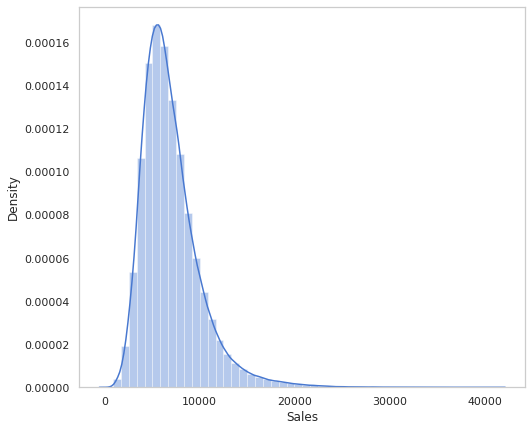

In [23]:
#To find distribution of target variable(Sales)
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Sales'])
ax.grid(False)


Conclusion:Target variable is almost normally distributed.
We will know perform square-root for moderate skew which is sqrt(x) for positively skewed data,sqrt(max(x+1)-x) for negatively skewed data.

Here is some information about skewness from Source:Kaggle.
What is Data Skewness?
Data Skewness is asymmetry in a statistical distribution, in which the curve appears distorted or skewed either to the left or to the right. Skewness can be quantified to define the extent to which a distribution differs from a normal distribution.

Normal Distribution
In a normal distribution, the graph appears as a classical, symmetrical “bell-shaped curve.” The mean, or average, and the mode, or maximum point on the curve, are equal.


Types of Skewness
In a symmetric bell curve, the mean, median, and mode are all the same value. But in a skewed distribution, the mean, median, and mode are all different values.
A skewed data distribution or bell curve can be either positive or negative.

Positively Skewed Distribution
A positively skewed distribution means that the extreme data results are larger. This skews the data in that it brings the mean (average) up. The mean will be larger than the median in a Positively skewed distribution.


Negatively Skewed Distribution
A negatively skewed distribution means the opposite: that the extreme data results are smaller. This means that the mean is brought down, and the median is larger than the mean in a negatively skewed distribution.

Reducing skewness
A data transformation may be used to reduce skewness. A distribution that is symmetric or nearly so is often easier to handle and interpret than a skewed distribution. More specifically, a normal or Gaussian distribution is often regarded as ideal as it is assumed by many statistical methods.

Reducing Right Skewness
Right skewness can be reduced applying following transformation

Square root
The square root, x to x^(1/2) = sqrt(x), is a transformation with a
moderate effect on distribution shape: it is weaker than the logarithm
and the cube root. It is also used for reducing right skewness, and also
has the advantage that it can be applied to zero values. Note that the
square root of an area has the units of a length. It is commonly applied
to counted data, especially if the values are mostly rather small.

In [24]:
Rossmann_Stores_df['Sales']=np.sqrt(Rossmann_Stores_df['Sales'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


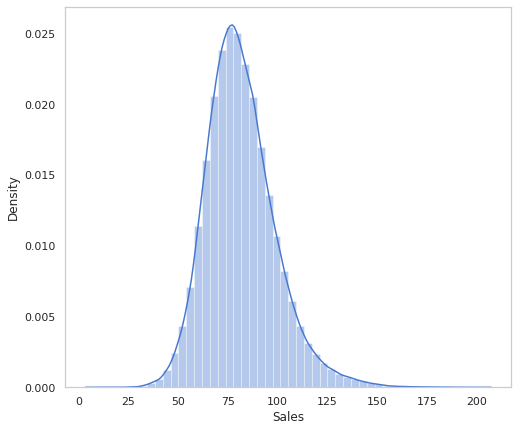

In [25]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Sales'])
ax.grid(False)

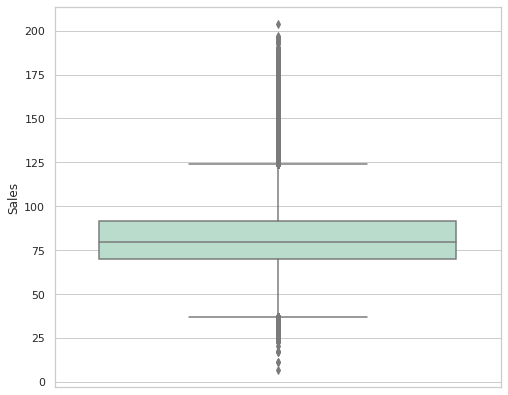

In [26]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Pastel2');
plt.show()

Let's remove the Outlier present in our target variable.

In [27]:
percentile_25 = np.percentile(Rossmann_Stores_df['Sales'],25)
percentile_75 = np.percentile(Rossmann_Stores_df['Sales'],75)
iqr = (percentile_75 - percentile_25)
upper_outlier_bound = percentile_75 + 1.5*iqr
lower_outlier_bound = percentile_25 - 1.5*iqr

In [28]:
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']>upper_outlier_bound].index,axis=0,inplace=True)
Rossmann_Stores_df.drop(index=Rossmann_Stores_df[Rossmann_Stores_df['Sales']<lower_outlier_bound].index,axis=0,inplace=True)


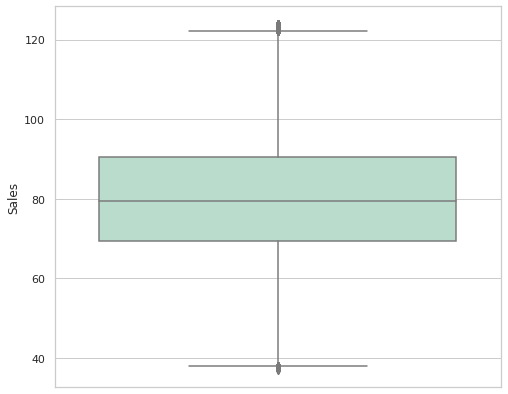

In [29]:
sns.set_style('whitegrid')
sns.boxplot(y=Rossmann_Stores_df['Sales'], palette='Pastel2');
plt.show()

**Distribution of Customers**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


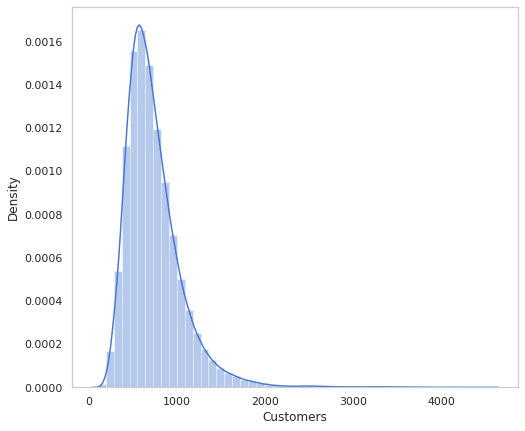

In [30]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Customers'])
ax.grid(False)

In [31]:
Rossmann_Stores_df['Customers'] = np.sqrt(Rossmann_Stores_df['Customers'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


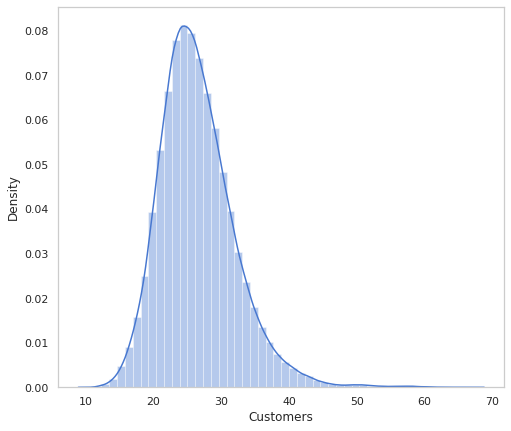

In [32]:
sns.set_theme(rc={'figure.figsize': (8,7)},style='whitegrid',palette='muted')
ax = sns.distplot(Rossmann_Stores_df['Customers'])
ax.grid(False)


**Conclusion:-**
* We have turned our target variable into a normal Distribution which is one of the important Assumption for Regression model.
* **Great! Our Target variable is ready to train and test.**

# Merging DataSets

Creating a new Dataset with merging of two datasets to perform further operations Smoothly.

In [36]:
#Merging of rossmann_Stores and Store_df
merged_df=pd.merge(left=Rossmann_Stores_df,right=Store_df ,how='left',on='Store')
merged_df.shape

(825571, 15)

 Categorical-Data

We have seen in the previous data analysis that there are some categorical data for the columns such as State holiday,School holiday,Store type,Assortment,etc.
Let's further analyse them.

In [37]:
#To Review merged dataset before analysis it further
merged_df.sample(10)


,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2
106232,579,6,2015-04-04,100.269636,34.467376,1,0,0,0,c,a,5404.901079,11.0,2012.0,0
417283,872,3,2014-03-26,81.166496,25.845696,1,0,0,0,a,c,5404.901079,9.0,2014.0,1
753048,611,3,2013-03-20,79.113842,22.605309,1,1,0,0,a,a,5404.901079,12.0,2002.0,1
29192,661,3,2015-07-01,91.032961,24.454039,1,1,0,0,d,c,5404.901079,7.0,2013.0,0
271637,394,2,2014-09-16,94.429868,25.357445,1,1,0,0,d,a,5404.901079,9.0,2013.0,0
150051,754,1,2015-02-16,101.064336,32.557641,1,1,0,0,c,c,5404.901079,5.0,2008.0,1
667783,90,2,2013-06-25,79.649231,30.033315,1,0,0,0,a,a,5404.901079,11.0,2007.0,0
112750,775,5,2015-03-27,84.528102,23.280893,1,0,0,0,d,c,5404.901079,12.0,2005.0,1
588169,494,3,2013-09-18,77.967942,31.352831,1,0,0,0,b,a,5404.901079,6.0,2011.0,0
342073,560,5,2014-06-20,118.549568,40.853396,1,1,0,0,c,c,5404.901079,7.0,2013.0,0


In [38]:
#To check datatypes of dataset
merged_df.dtypes

Store                          int64
DayOfWeek                      int64
Date                          object
Sales                        float64
Customers                    float64
Open                           int64
Promo                          int64
StateHoliday                  object
SchoolHoliday                  int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
dtype: object

Here we can see that there are columns like Date,StateHoliday,SchoolHoliday,Storetype,Assortment which are of datatypes object but in machine learning, algorithm works quite well with numerical data.
Let's perform some operation to make them work.

In [39]:
#merged_df['StoreType'].value_counts()
merged_df['StoreType'].nunique()

4

# **Features Transformation**

In [55]:
#Convert the a,b,c into 1 as they represent Holiday
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('a',"1") if 'a' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('b',"1") if 'b' in str(x) else x)
merged_df["StateHoliday"] = merged_df['StateHoliday'].apply(lambda x: str(x).replace('c',"1") if 'c' in str(x) else x)

merged_df["StateHoliday"] = merged_df["StateHoliday"].astype(int)

In [56]:
merged_df['StateHoliday'].value_counts()

0    824798
1       773
Name: StateHoliday, dtype: int64

Converting datetime object into year,week and month format.

In [57]:
#Converting date to datetime
merged_df['Date']=pd.to_datetime(merged_df['Date'])

In [58]:
#checking datatype of Date
merged_df['Date'].dtypes

dtype('<M8[ns]')

In [59]:
#To convert date in year,month and week
merged_df['year']=merged_df['Date'].dt.year
merged_df['month']=merged_df['Date'].dt.month
merged_df['week']=merged_df['Date'].dt.week


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  after removing the cwd from sys.path.


In [60]:
#Deleting the date column
del merged_df['Date']

In [61]:
merged_df.columns

Index(['Store', 'DayOfWeek', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'year', 'month', 'week'],
      dtype='object')

# EDA with Data Visualization

**Sales With and without log transformation.**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


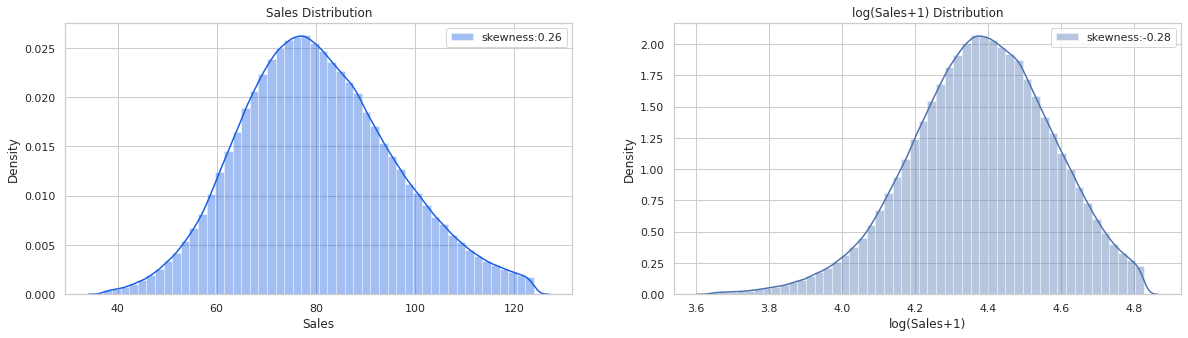

In [64]:
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 


#Compare Distribution of Sales withot and with log tranformation after cleaning it.
fig = plt.figure(figsize=(20,5))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122)
g1 = sns.distplot(merged_df['Sales'],hist = True,label='skewness:{:.2f}'.format(merged_df['Sales'].skew()),ax = ax1,color='#175ee3')
g1.legend()
g1.set(xlabel = 'Sales', ylabel = 'Density', title = 'Sales Distribution')
g2 = sns.distplot(np.log1p(merged_df['Sales']),hist = True,label='skewness:{:.2f}'.format(np.log1p(merged_df['Sales']).skew()),ax=ax2)
g2.legend()
g2.set(xlabel = 'log(Sales+1)',ylabel = 'Density', title = 'log(Sales+1) Distribution')
plt.show()

**Relationship of sales with Open and Close**

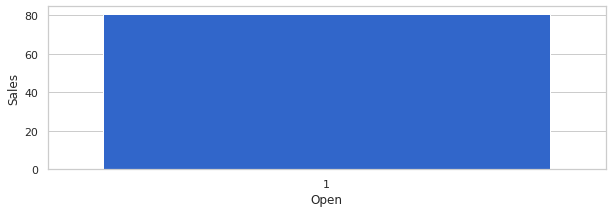

In [67]:
sns.set_theme(palette='autumn',rc={'figure.figsize': (10,3)},style='whitegrid')
sns.barplot(x = 'Open',y = 'Sales',data =merged_df,color='#175ee3')
 
# Show the plot
plt.show()

# Feature Selection for our Regression Model.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3db34a8950>,
      dtype=object)

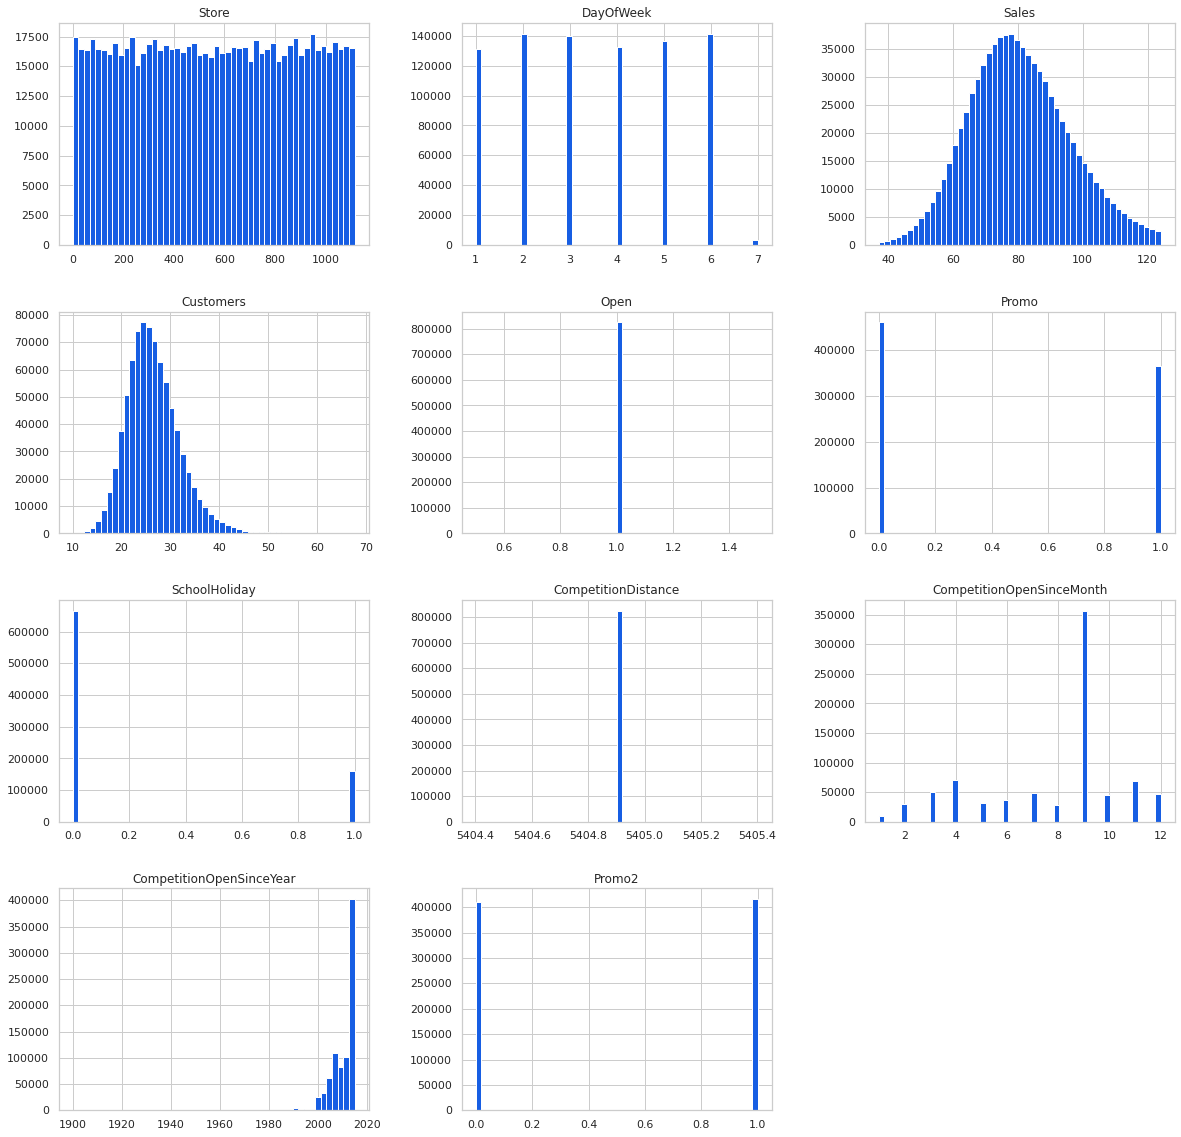

In [42]:
merged_df.hist(figsize = (20,20),bins=50,color='#175ee3')

**Analysing Continous Variable with Target Variable**

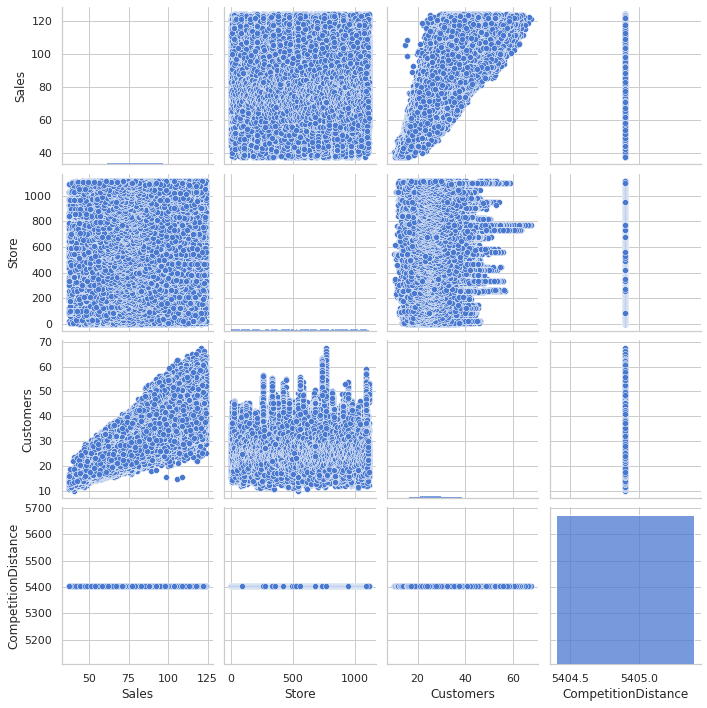

In [44]:
Plot=merged_df[['Sales','Store', 'Customers','CompetitionDistance']]
sns.pairplot(Plot)
plt.show()

**Sales Vs Stores**

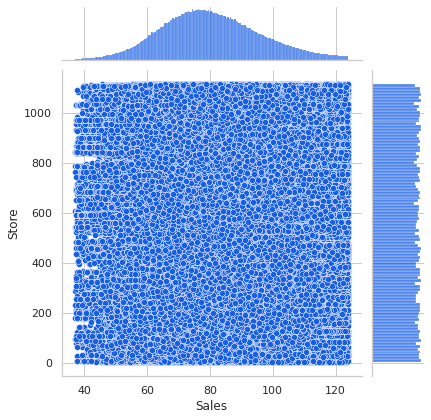

In [46]:
#join plot for store vs sales
sns.jointplot(x='Sales',y ='Store', data = merged_df,color='#175ee3')
plt.show()

**Sales Vs Customers**

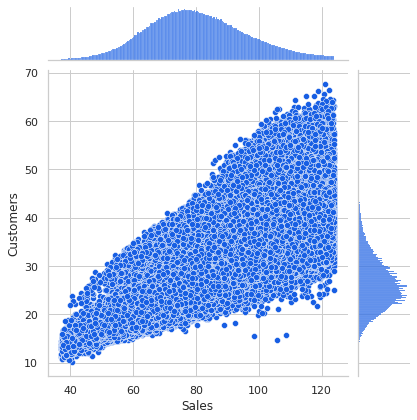

In [68]:
sns.jointplot(x='Sales',y ='Customers', data =merged_df,color='#175ee3')
plt.show()

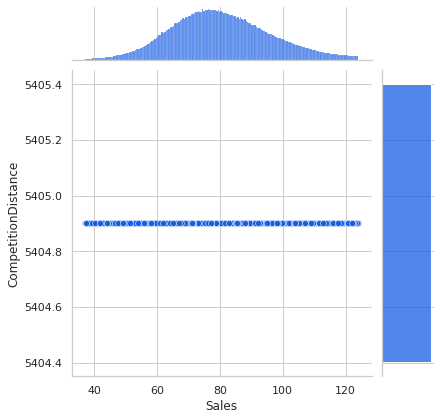

In [71]:
sns.jointplot(x='Sales',y ='CompetitionDistance', data =merged_df,color='#175ee3')
plt.show()

**Affect of StateHoliday and SchoolHoliday over Sales**

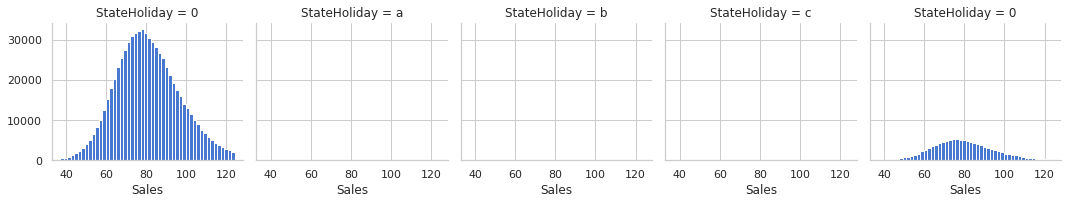

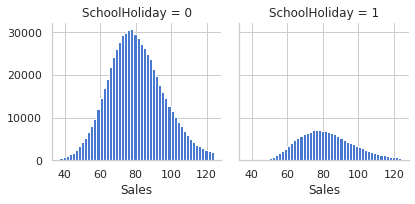

In [51]:
g = sns.FacetGrid(merged_df, col='StateHoliday')
g.map(plt.hist, 'Sales',bins=50)
plt.show()

g = sns.FacetGrid(merged_df, col='SchoolHoliday')
g.map(plt.hist, 'Sales',bins=50)
plt.show()


Affect of CompetitionOpenSinceMonth over Sales

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:337: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


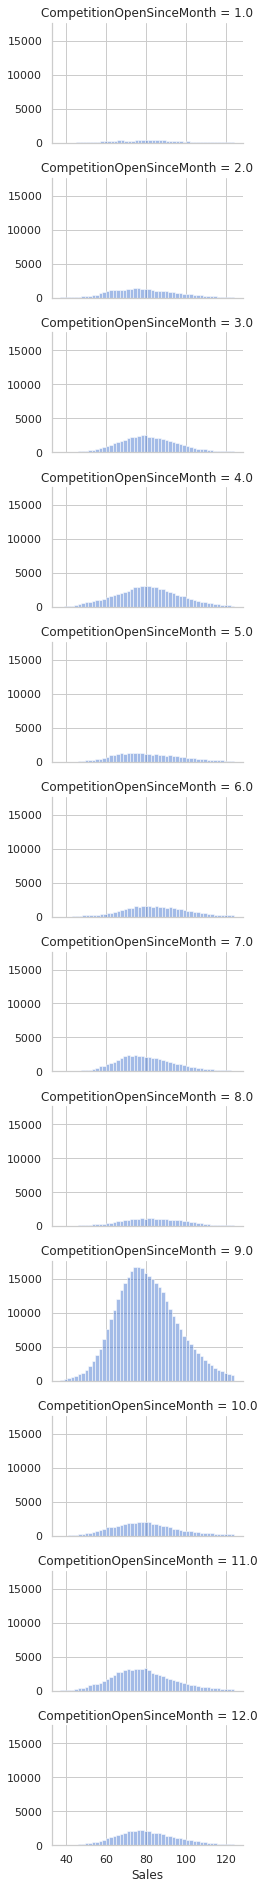

In [52]:
grid = sns.FacetGrid(merged_df, row='CompetitionOpenSinceMonth',palette='Set3',size=2.2, aspect=1.6)
grid.map(plt.hist, 'Sales', alpha=.5, bins=50)
grid.add_legend();

**Effect of promo over Sales and Customers**

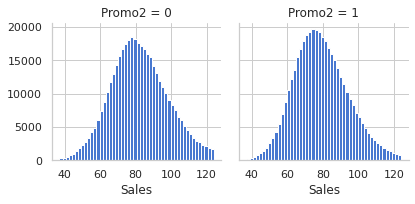

In [53]:
g = sns.FacetGrid(merged_df, col='Promo2',palette='Set3')
g.map(plt.hist, 'Sales',bins=50)
plt.show()

Conclusion:Promo feature no able to impact sales and Customers as much it should be.

# Analysing Categorical type with Target Variable

**Sales on Monthly Basis**

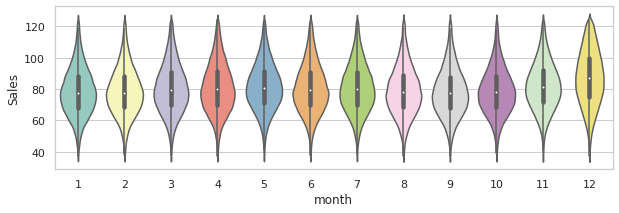

In [72]:
#violinplot of month and sales
sns.set_theme(style='whitegrid')
ax=sns.violinplot(x='month',y='Sales',data=merged_df, palette='Set3')

**Sales on Yearly Basis**

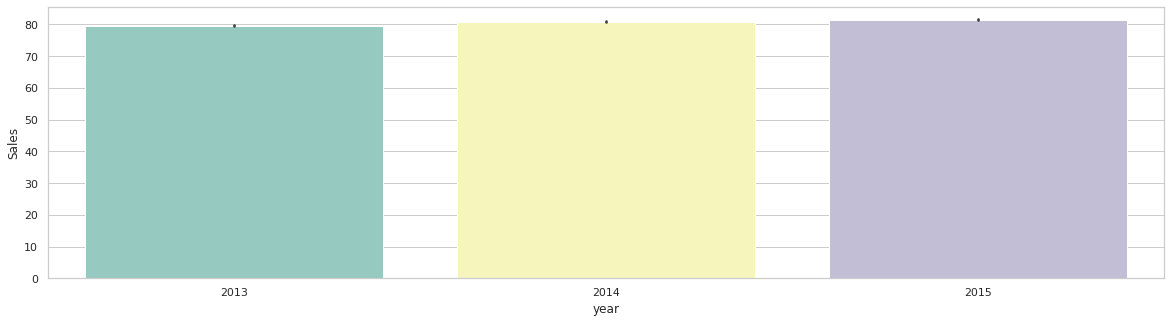

In [78]:
#barplot of year and sales
sns.set_theme(style='whitegrid')
ax=sns.barplot(x='year',y='Sales',data=merged_df, palette='Set3')

**Sales on Weekly Basis**

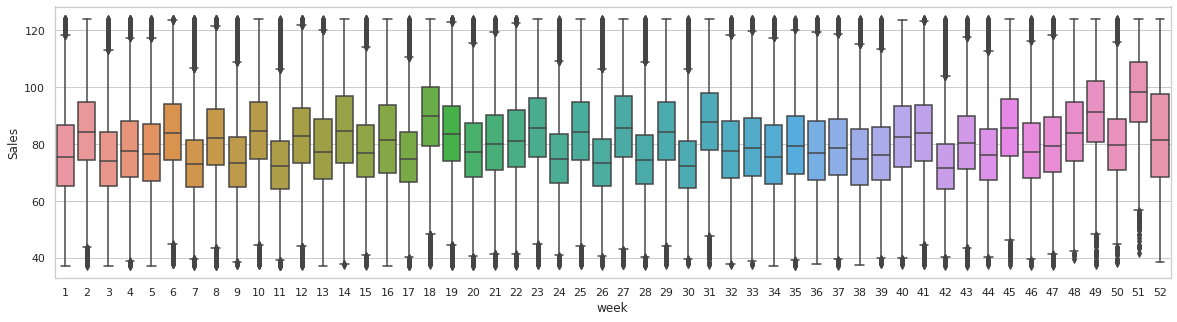

In [80]:
#Weekly Basis
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20,5)})
ax=sns.boxplot(x='week',y='Sales',data=merged_df)

**Sales on Weekly Basis**

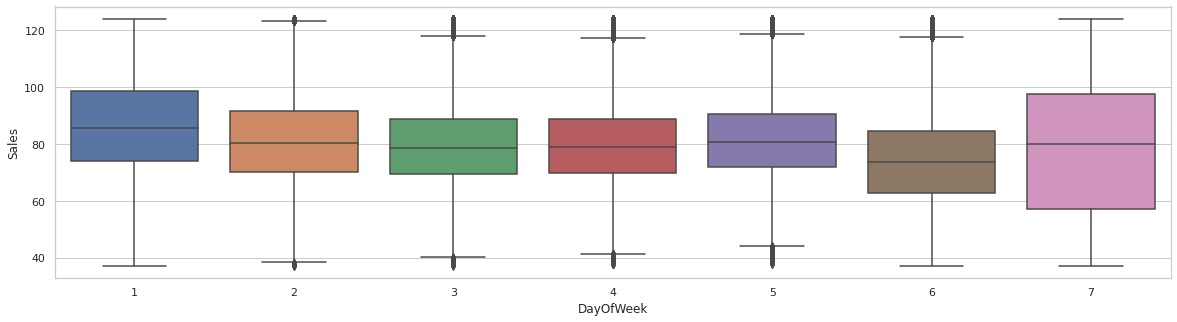

In [85]:
#DayOfWeek vs Sales 
sns.set_theme(style='whitegrid',rc={'figure.figsize':(20,5)})
ax=sns.boxplot(x='DayOfWeek',y='Sales',data=merged_df)

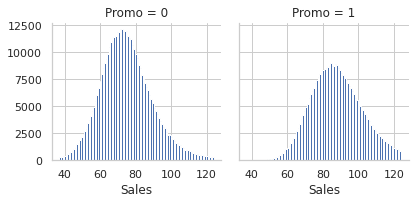

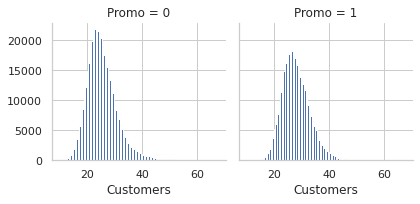

In [86]:
#Promo vs Sales
g = sns.FacetGrid(merged_df, col='Promo',palette='Set3')
g.map(plt.hist, 'Sales',bins=100)
plt.show()
#Promo vs Customers
g = sns.FacetGrid(merged_df, col='Promo',palette='Set3')
g.map(plt.hist, 'Customers',bins=100)
plt.show()

Effect on Sales when store is open and Close

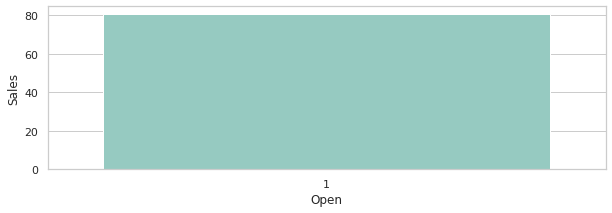

In [87]:
sns.set_theme(palette='Set3',rc={'figure.figsize': (10,3)},style='whitegrid')
sns.barplot(x = 'Open',y = 'Sales',data = merged_df)
 
# Show the plot
plt.show()

Here we conclude that
1.When stores are closed there is no sales.
2.Further if we remove the open column it will 

### **One Hot Encoding**

In [88]:
merged_df['Assortment'].nunique()

3

In [89]:
merged_df['StateHoliday'].nunique()

2

Performing one hot encoding for the StoreType and Assortment.

In [90]:
merged_df=pd.get_dummies(merged_df,columns=['StoreType','Assortment'])
#k-1 hot encoding
 #pd.get_dummies(df,columns=['Storetype','Assortment','StateHoliday'],drop_first=True)
 

In [93]:
merged_df

,Store,DayOfWeek,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,year,month,week,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,1,5,72.546537,23.558438,1,1,0,1,5404.901079,9.0,2008.0,0,2015,7,31,0,0,1,0,1,0,0
1,2,5,77.871689,25.000000,1,1,0,1,5404.901079,11.0,2007.0,1,2015,7,31,1,0,0,0,1,0,0
2,3,5,91.181138,28.653098,1,1,0,1,5404.901079,12.0,2006.0,1,2015,7,31,1,0,0,0,1,0,0
3,4,5,118.300465,38.704005,1,1,0,1,5404.901079,9.0,2009.0,0,2015,7,31,0,0,1,0,0,0,1
4,5,5,69.440622,23.643181,1,1,0,1,5404.901079,4.0,2015.0,0,2015,7,31,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
825566,682,2,58.094750,23.790755,1,0,1,1,5404.901079,9.0,2006.0,0,2013,1,1,0,1,0,0,1,0,0
825567,733,2,103.754518,48.754487,1,0,1,1,5404.901079,10.0,1999.0,0,2013,1,1,0,1,0,0,0,1,0
825568,769,2,70.957734,35.327043,1,0,1,1,5404.901079,9.0,2013.0,1,2013,1,1,0,1,0,0,0,1,0
825569,948,2,67.014924,32.233523,1,0,1,1,5404.901079,9.0,2013.0,0,2013,1,1,0,1,0,0,0,1,0


# **Find Features For Model**

In [95]:
merged_final_df=merged_df[['DayOfWeek', 'Sales', 'Customers', 'Promo','SchoolHoliday','CompetitionDistance','CompetitionOpenSinceYear', 'Promo2',  'year', 'month',
       'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'  ]]

In [96]:
#Corr map
correlation = merged_final_df.corr()
correlation

,DayOfWeek,Sales,Customers,Promo,SchoolHoliday,CompetitionDistance,CompetitionOpenSinceYear,Promo2,year,month,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
DayOfWeek,1.000000,-0.183816,-0.118866,-0.281904,-0.138190,NaN,0.002101,-0.004353,0.001874,-0.016748,-0.002587,0.037669,-0.003893,-0.004460,-0.006189,0.025342,0.001297
Sales,-0.183816,1.000000,0.811582,0.408688,0.040792,NaN,0.005957,-0.101095,0.048173,0.062816,-0.039988,0.078661,0.008402,0.015746,-0.115980,0.049162,0.106624
Customers,-0.118866,0.811582,1.000000,0.219628,0.029900,NaN,0.003014,-0.204656,0.003718,0.049387,0.111678,0.332881,0.090437,-0.276374,-0.023250,0.300018,-0.034739
Promo,-0.281904,0.408688,0.219628,1.000000,0.029515,NaN,-0.001129,0.002430,0.023797,-0.008769,-0.000180,-0.022750,0.003330,0.003848,0.004640,-0.013277,-0.002078
SchoolHoliday,-0.138190,0.040792,0.029900,0.029515,1.000000,NaN,-0.000221,-0.007986,-0.039720,0.120486,0.002203,-0.002728,0.002381,-0.003396,0.003962,-0.002194,-0.003543
CompetitionDistance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
CompetitionOpenSinceYear,0.002101,0.005957,0.003014,-0.001129,-0.000221,NaN,1.000000,-0.021043,0.001366,0.003677,-0.035030,0.002071,-0.023946,0.054830,-0.089790,-0.000357,0.089975
Promo2,-0.004353,-0.101095,-0.204656,0.002430,-0.007986,NaN,-0.021043,1.000000,-0.005627,-0.024597,-0.071572,-0.046263,-0.000230,0.089680,-0.011831,-0.009176,0.013621
year,0.001874,0.048173,0.003718,0.023797,-0.039720,NaN,0.001366,-0.005627,1.000000,-0.268165,0.000580,0.001615,0.002284,-0.002743,-0.001772,-0.000434,0.001858
month,-0.016748,0.062816,0.049387,-0.008769,0.120486,NaN,0.003677,-0.024597,-0.268165,1.000000,0.004358,0.003879,0.005473,-0.009772,-0.007301,0.001172,0.007084


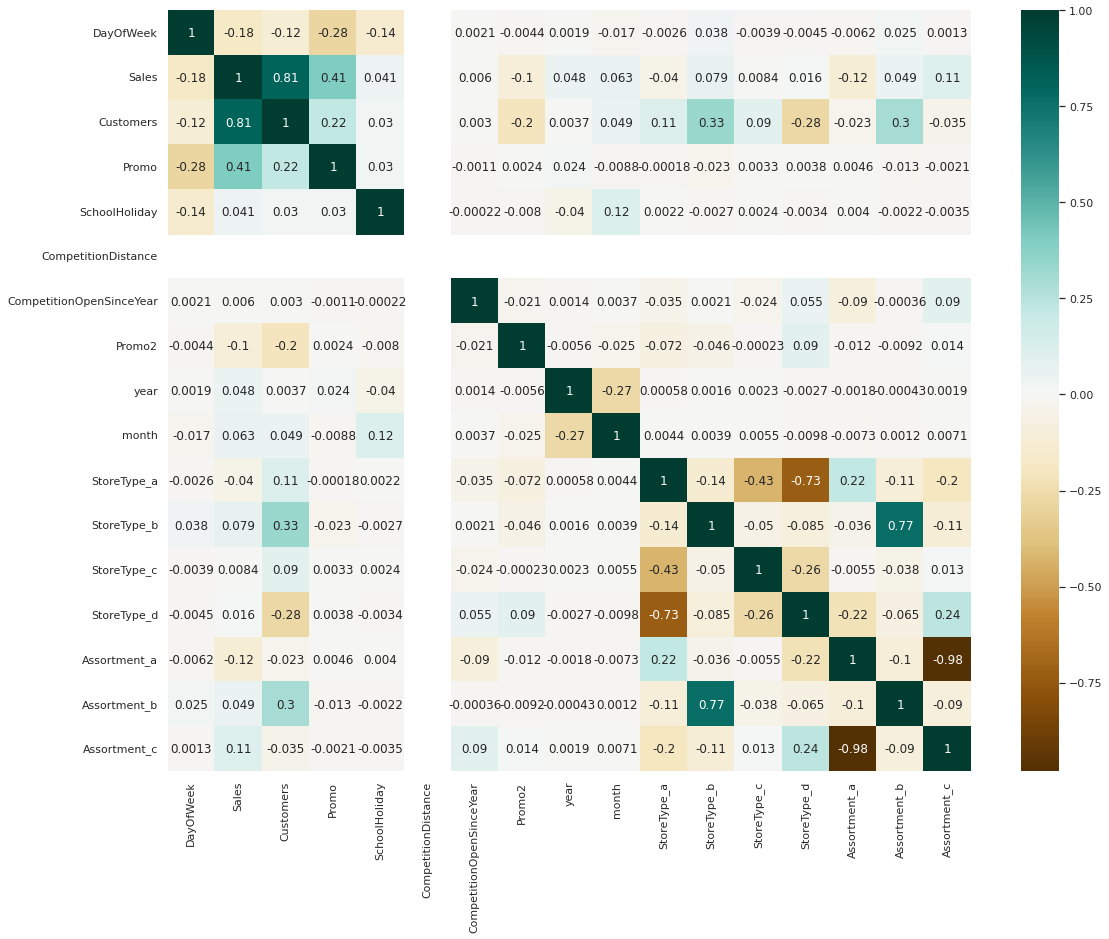

In [97]:
# Heat Map
plt.figure(figsize=(18,14))
sns.heatmap(correlation, annot=True, linewidths=0.0, cmap='BrBG')
plt.show()

# **Building Regression Model**

**Linear Regression Model**

In [102]:
merged_final_df.columns

Index(['DayOfWeek', 'Sales', 'Customers', 'Promo', 'SchoolHoliday',
       'CompetitionDistance', 'CompetitionOpenSinceYear', 'Promo2', 'year',
       'month', 'StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c'],
      dtype='object')

In [104]:

x=merged_final_df[['Customers','Promo','SchoolHoliday','CompetitionDistance','StoreType_a', 'StoreType_b', 'StoreType_c', 'StoreType_d',
       'Assortment_a', 'Assortment_b', 'Assortment_c', 'year', 'month',
       'DayOfWeek']]
y=merged_df['Sales']

In [106]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


In [107]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, x, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    print('__________________________________')
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

In [108]:
'''from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('std_scalar', StandardScaler())
])

X_train = pipeline.fit_transform(X_train)
X_test = pipeline.transform(X_test)
'''


In [109]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression(normalize=True)
lin_reg.fit(X_train,y_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


LinearRegression(normalize=True)

In [117]:
# print the intercept
print(lin_reg.intercept_)

9095.422062720127


In [111]:
coeff_df = pd.DataFrame(lin_reg.coef_, x.columns, columns=['Coefficient'])
coeff_df

,Coefficient
Customers,1.402376e+01
Promo,3.156277e+00
SchoolHoliday,6.696333e-02
CompetitionDistance,1.239007e+15
StoreType_a,-1.783948e+13
StoreType_b,-4.442913e+12
StoreType_c,-1.222586e+13
StoreType_d,-1.656095e+13
Assortment_a,1.359938e+13
Assortment_b,2.621216e+12


In [112]:
pred = lin_reg.predict(X_test)

In [118]:
test_pred = lin_reg.predict(X_test)
train_pred = lin_reg.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df = pd.DataFrame(data=[["Linear Regression", *evaluate(y_test, test_pred) , cross_val(LinearRegression())]], 
                          columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])


Test set evaluation:
_____________________________________
MAE: 5.27282893825841
MSE: 44.52393872553816
RMSE: 6.672626074158371
R2 Square 0.815904265390289
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.277749273293749
MSE: 44.524865070777736
RMSE: 6.672695487640488
R2 Square 0.8165565862063942
__________________________________


Ridge Regression

In [114]:
from sklearn.linear_model import Ridge

model = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
model.fit(X_train, y_train)
pred = model.predict(X_test)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n_____________________________________')
print_evaluate(y_test, test_pred)
print('====================================')
print('Train set evaluation:\n_____________________________________')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Ridge Regression", *evaluate(y_test, test_pred) , cross_val(Ridge())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)


Test set evaluation:
_____________________________________
MAE: 5.272750390622675
MSE: 44.523110140150045
RMSE: 6.672563985466909
R2 Square 0.815907691390775
__________________________________
Train set evaluation:
_____________________________________
MAE: 5.277709030869103
MSE: 44.52472900802574
RMSE: 6.672685292146314
R2 Square 0.8165571467878956
__________________________________


**Elastic Net**

In [115]:
from sklearn.linear_model import ElasticNet

model = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
model.fit(X_train, y_train)

test_pred = model.predict(X_test)
train_pred = model.predict(X_train)

print('Test set evaluation:\n')
print_evaluate(y_test, test_pred)
print('Train set evaluation:\n')
print_evaluate(y_train, train_pred)

results_df_2 = pd.DataFrame(data=[["Elastic Net Regression", *evaluate(y_test, test_pred) , cross_val(ElasticNet())]], 
                            columns=['Model', 'MAE', 'MSE', 'RMSE', 'R2 Square', "Cross Validation"])
results_df = results_df.append(results_df_2, ignore_index=True)

Test set evaluation:

MAE: 5.280180271789653
MSE: 44.696008391963545
RMSE: 6.685507339907986
R2 Square 0.8151927988724703
__________________________________
Train set evaluation:

MAE: 5.28450730279786
MSE: 44.69266215522156
RMSE: 6.685257074729555
R2 Square 0.8158652585640518
__________________________________


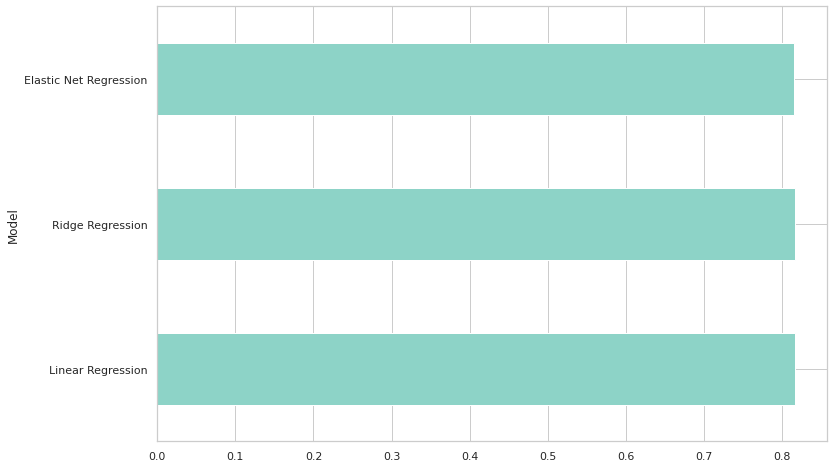

In [116]:
#Model Comparison
results_df.set_index('Model', inplace=True)
results_df['R2 Square'].plot(kind='barh', figsize=(12, 8))